In [1]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
# Importing the dataset

diab_df = pd.read_csv('diabetes.csv')

# Get a preview of the dataset

diab_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
# Get overall information for the dataset

diab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# Data exploration

diab_df.describe()

# In the features of Glucose, Blood Pressure, Skin thickness, Insulin and BMI, the lowest value is 0. 
# However, it is not biologically possible to have a zero value for those attributes. Hence we can assume that those are actually missing values. 
# They will be replaced with NA and then imputed later on.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3f7e262240>,
      dtype=object)

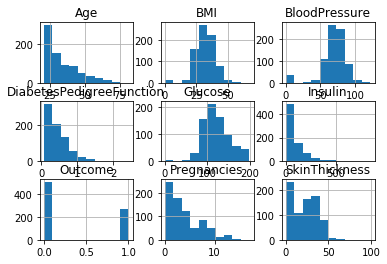

In [5]:
# Explore the distribution of the variables in the dataset

diab_df.hist()

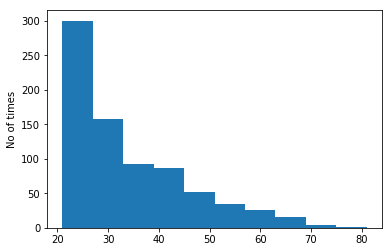

In [6]:
plt.hist(diab_df['Age'])
plt.ylabel('No of times')
plt.show()

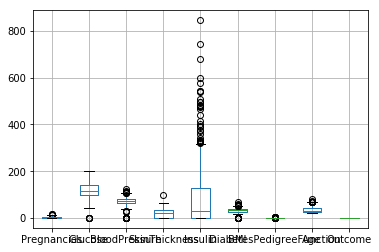

In [7]:
diab_df.boxplot()

{'boxes': [<matplotlib.lines.Line2D at 0x7f3f7a393828>],
 'caps': [<matplotlib.lines.Line2D at 0x7f3f7a398278>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3f7a398ef0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f3f7a398ac8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f3f7a393978>,
  <matplotlib.lines.Line2D at 0x7f3f7a393e10>]}

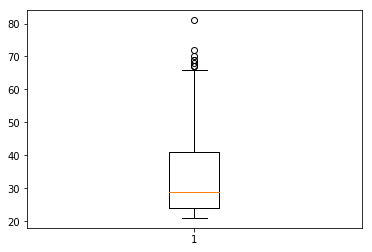

In [8]:
plt.boxplot(diab_df.Age)

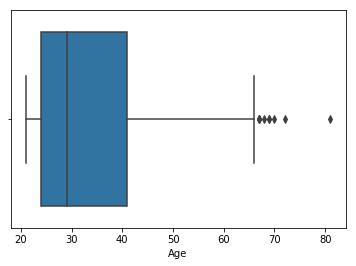

In [9]:
sns.boxplot(x=diab_df['Age'])

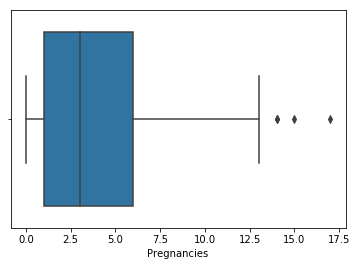

In [10]:
sns.boxplot(x=diab_df['Pregnancies'])

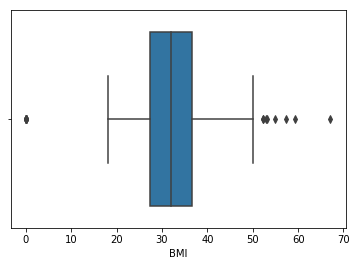

In [11]:
sns.boxplot(x=diab_df['BMI'])

# There seem to be some outliers in the BMI column

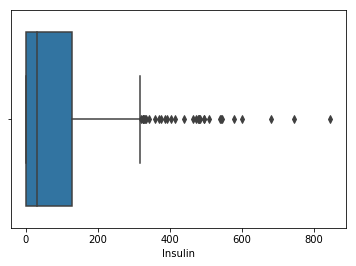

In [12]:
sns.boxplot(x=diab_df['Insulin'])

# There seem to be a lot of outliers in the Insulin column

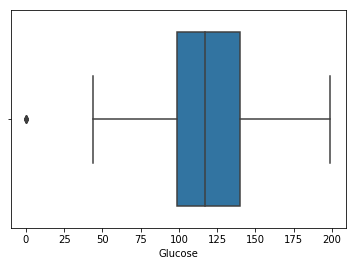

In [13]:
sns.boxplot(x=diab_df['Glucose'])

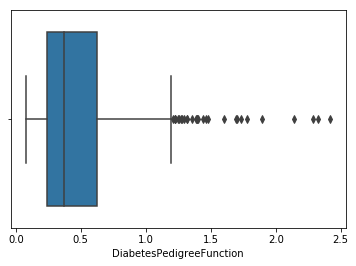

In [14]:
sns.boxplot(x=diab_df['DiabetesPedigreeFunction'])

# There seem to be a lot of outliers in the Diabetes Pedigree Function column

In [15]:
diab_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [16]:
# We can get a count of the number of missing values on each of these columns by marking all of the values in the subset of the DataFrame we are interested in that have zero values as Null

# mark zero values as missing or NaN
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']
diab_df[cols] = diab_df[cols].replace(0, np.NaN)
# count the number of NaN values in each column
print(diab_df.isnull().sum())
print(diab_df.head(20))

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6    148.0           72.0           35.0      NaN  33.6   
1             1     85.0           66.0           29.0      NaN  26.6   
2             8    183.0           64.0            NaN      NaN  23.3   
3             1     89.0           66.0           23.0     94.0  28.1   
4             0    137.0           40.0           35.0    168.0  43.1   
5             5    116.0           74.0            NaN      NaN  25.6   
6             3     78.0           50.0           32.0     88.0  31.0   
7            10    115.0            NaN            NaN      NaN  35.3   
8             2    197.0           70.0   

In [17]:
# Impute missing data 

# fill missing values with mean column values
diab_df.fillna(diab_df.mean(), inplace=True)
# count the number of NaN values in each column
print(diab_df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [18]:
# Use z-score for detection of outliers

from scipy import stats
import numpy as np
z = np.abs(stats.zscore(diab_df))
print(z)

# Print the values which have a z-score higher than 3
print(np.where(z > 3))

[[0.63994726 0.86510807 0.03351824 ... 0.46849198 1.4259954  1.36589591]
 [0.84488505 1.20616153 0.52985903 ... 0.36506078 0.19067191 0.73212021]
 [1.23388019 2.0158134  0.69530596 ... 0.60439732 0.10558415 1.36589591]
 ...
 [0.3429808  0.0225789  0.03351824 ... 0.68519336 0.27575966 0.73212021]
 [0.84488505 0.14180757 1.02619983 ... 0.37110101 1.17073215 1.36589591]
 [0.84488505 0.94314317 0.19896517 ... 0.47378505 0.87137393 0.73212021]]
(array([  4,   8,  13,  18,  43,  45,  57,  58,  88, 106, 111, 120, 120,
       123, 125, 125, 153, 159, 177, 177, 186, 220, 228, 228, 247, 286,
       298, 330, 370, 370, 371, 392, 395, 409, 415, 445, 445, 445, 453,
       455, 459, 486, 549, 579, 584, 593, 597, 621, 645, 655, 666, 673,
       684, 691, 695, 753]), array([6, 4, 4, 2, 2, 6, 3, 6, 0, 2, 4, 3, 5, 7, 2, 5, 4, 0, 2, 5, 4, 4,
       4, 6, 4, 4, 0, 6, 4, 6, 6, 4, 6, 4, 4, 3, 5, 6, 7, 0, 7, 4, 2, 3,
       4, 6, 2, 6, 4, 4, 7, 5, 7, 2, 4, 4]))


In [19]:
# Since a lot of observations have a z-score higher than 3, removing them would result in a lot data loss
# Hence I selected values having a z-score higher than 5 to remove only the most extreme observations

print(np.where(z > 5))
diab_df_o = diab_df[(z < 5).all(axis=1)]

(array([  4,  13, 177, 228, 228, 247, 370, 445, 579, 584]), array([6, 4, 5, 4, 6, 4, 6, 6, 3, 4]))


In [20]:
diab_df_o.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.00000,155.548223,33.600000,0.627,50,1
1,1,85.0,66.000000,29.00000,155.548223,26.600000,0.351,31,0
2,8,183.0,64.000000,29.15342,155.548223,23.300000,0.672,32,1
3,1,89.0,66.000000,23.00000,94.000000,28.100000,0.167,21,0
5,5,116.0,74.000000,29.15342,155.548223,25.600000,0.201,30,0
6,3,78.0,50.000000,32.00000,88.000000,31.000000,0.248,26,1
7,10,115.0,72.405184,29.15342,155.548223,35.300000,0.134,29,0
8,2,197.0,70.000000,45.00000,543.000000,30.500000,0.158,53,1
9,8,125.0,96.000000,29.15342,155.548223,32.457464,0.232,54,1
10,4,110.0,92.000000,29.15342,155.548223,37.600000,0.191,30,0


In [21]:
"""
# Function to calculate correlation coefficient between two arrays
def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 20, xycoords = ax.transAxes)
    
# Create a pair grid instance
grid = sns.PairGrid(data= diab_df_o)

# Map the plots to the locations
grid = grid.map_upper(plt.scatter, color = 'darkred')
grid = grid.map_upper(corr)
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
grid = grid.map_diag(plt.hist, bins = 10, edgecolor =  'k', color = 'darkred');
"""

"\n# Function to calculate correlation coefficient between two arrays\ndef corr(x, y, **kwargs):\n    \n    # Calculate the value\n    coef = np.corrcoef(x, y)[0][1]\n    # Make the label\n    label = r'$\rho$ = ' + str(round(coef, 2))\n    \n    # Add the label to the plot\n    ax = plt.gca()\n    ax.annotate(label, xy = (0.2, 0.95), size = 20, xycoords = ax.transAxes)\n    \n# Create a pair grid instance\ngrid = sns.PairGrid(data= diab_df_o)\n\n# Map the plots to the locations\ngrid = grid.map_upper(plt.scatter, color = 'darkred')\ngrid = grid.map_upper(corr)\ngrid = grid.map_lower(sns.kdeplot, cmap = 'Reds')\ngrid = grid.map_diag(plt.hist, bins = 10, edgecolor =  'k', color = 'darkred');\n"

In [22]:
"""
# Correlation Analysis
sns.set(style="white")

def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)

g = sns.PairGrid(diab_df_o, palette=["red"])
g.map_upper(plt.scatter, s=10)
g.map_diag(sns.distplot, kde=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_lower(corrfunc)
"""

'\n# Correlation Analysis\nsns.set(style="white")\n\ndef corrfunc(x, y, **kws):\n    r, _ = stats.pearsonr(x, y)\n    ax = plt.gca()\n    ax.annotate("r = {:.2f}".format(r),\n                xy=(.1, .9), xycoords=ax.transAxes)\n\ng = sns.PairGrid(diab_df_o, palette=["red"])\ng.map_upper(plt.scatter, s=10)\ng.map_diag(sns.distplot, kde=False)\ng.map_lower(sns.kdeplot, cmap="Blues_d")\ng.map_lower(corrfunc)\n'

In [23]:
# Separate the independent and the dependent variables

x = diab_df_o.iloc[:, :-8].values
y = diab_df_o.iloc[:, 8].values

In [24]:
# Splitting the dataset into training and testing set

from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

/home/ashmi/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [25]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

/home/ashmi/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/ashmi/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/ashmi/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [26]:
# Fitting K-NN to the Training set

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [27]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [28]:
cm

array([[103,  19],
       [ 52,  16]])

In [29]:
from sklearn.metrics import accuracy_score 
print ('Accuracy Score using KNN:',accuracy_score(y_test, y_pred))

Accuracy Score using KNN: 0.6263157894736842


In [30]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm
print ('Accuracy Score using Logistic Regression :',accuracy_score(y_test, y_pred))

Accuracy Score using Logistic Regression : 0.6736842105263158


In [31]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[112,  10],
       [ 51,  17]])

In [32]:
print ('Accuracy Score using Decision Tree :',accuracy_score(y_test, y_pred))

Accuracy Score using Decision Tree : 0.6789473684210526


In [33]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[112,  10],
       [ 51,  17]])

In [34]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[122,   0],
       [ 68,   0]])

In [37]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

/home/ashmi/anaconda3/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
